<a href="https://colab.research.google.com/github/Saibhossain/DeepLearning-with-PyTorch/blob/main/Fashion_MNIST_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST Project



you will classify Fashion-MNIST dataset using convolutional neural networks.

Download the datasets you needed for this lab.

The following are the PyTorch modules you are going to need


In [ ]:
!pip install pandas numpy scikit-learn torch torchvision matplotlib

In [19]:
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

In [20]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [48]:
transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])
dataset_train = dsets.FashionMNIST(root='./fashion/data', train=True, transform=composed, download=True)
dataset_val = dsets.FashionMNIST(root='./fashion/data', train=False, transform=composed, download=True)

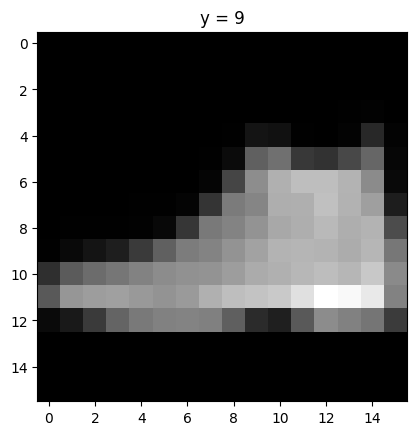

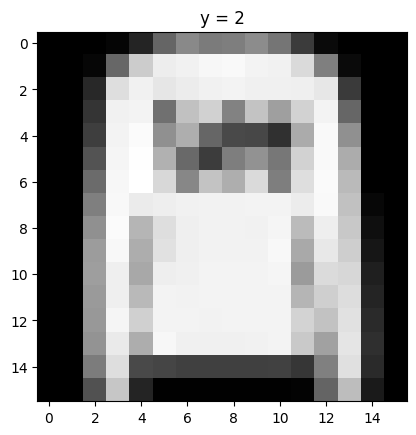

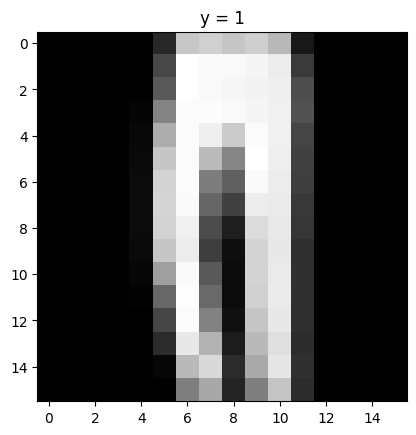

In [49]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break

In [57]:
class CNN_batch(nn.Module):
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Calculate the flattened size dynamically
        dummy_input = torch.zeros(1, 1, 28, 28)  # For 28x28 input
        x = self.maxpool1(torch.relu(self.conv1_bn(self.cnn1(dummy_input))))
        x = self.maxpool2(torch.relu(self.conv2_bn(self.cnn2(x))))
        self.flattened_size = x.view(-1).size(0)

        self.fc1 = nn.Linear(self.flattened_size, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(number_of_classes)

    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)

        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        return x


In [58]:
class CNN(nn.Module):

    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [59]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [60]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

In [ ]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    print(f"Epoch {epoch+1}/{n_epochs} => Cost: {cost:.4f}, Accuracy: {accuracy * 100:.2f}%")

# Optional: print final accuracy
print(f"\nFinal Validation Accuracy: {accuracy_list[-1] * 100:.2f}%")

Epoch 1/5 => Cost: 1629.5677, Accuracy: 9.01%
Epoch 2/5 => Cost: 1629.5677, Accuracy: 9.01%
Epoch 3/5 => Cost: 1629.5677, Accuracy: 9.01%
Epoch 4/5 => Cost: 1629.5677, Accuracy: 9.01%


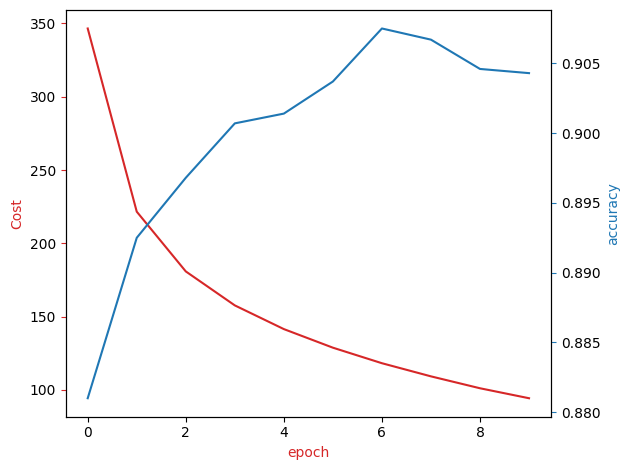

In [63]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [ ]:
# Transforms
composed = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
IMAGE_SIZE = 28

# Dataset and loaders
dataset_train = dsets.FashionMNIST(root='./fashion/data', train=True, transform=composed, download=True)
dataset_val = dsets.FashionMNIST(root='./fashion/data', train=False, transform=composed, download=True)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100)

# Model, loss, optimizer
model = CNN_batch(out_1=16, out_2=32, number_of_classes=10)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10
N_test = len(dataset_val)
cost_list = []
accuracy_list = []

for epoch in range(n_epochs):
    model.train()
    cost = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost += loss.item()

    correct = 0
    model.eval()
    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(device), y_test.to(device)
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()

    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    print(f"Epoch {epoch+1}/{n_epochs} => Cost: {cost:.4f}, Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10 => Cost: 346.5771, Accuracy: 88.10%
Epoch 2/10 => Cost: 221.5895, Accuracy: 89.25%
Epoch 3/10 => Cost: 180.8296, Accuracy: 89.68%
Epoch 4/10 => Cost: 157.6459, Accuracy: 90.07%
Epoch 5/10 => Cost: 141.4773, Accuracy: 90.14%
Epoch 6/10 => Cost: 128.7983, Accuracy: 90.37%
